<a href="https://colab.research.google.com/github/Nachiket1904/EDA-on-penguin-dataset/blob/main/Penguin_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revolutionizing EDA with ChatGPT: A New Frontier in Data Analysis

This notebook accompanies our blog post on using ChatGPT for Exploratory Data Analysis (EDA) with the Penguin dataset. Here, we demonstrate how AI can simplify and enrich data analysis, making insights more accessible and profound.

## The Penguin Dataset
The Penguin dataset is a comprehensive collection of data on various penguin species found in Antarctica. It includes information on species, island, bill length, bill depth, flipper length, body mass, sex, and year of observation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
penguins_df = pd.read_csv('/kaggle/input/palmer-archipelago-penguin-data/penguins_lter.csv')
print(penguins_df.head())


  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \


## Overall Structure 📊

Our EDA is organized into five key sections:
1. Data Cleaning and Preparation 🧹
2. Exploratory Data Analysis 🔍
3. Insight Generation 💡
4. Conclusion and Recommendations 📝


## Data Cleaning and Preparation 🧹

Before diving into the analysis, we ensure our dataset is clean. This involves addressing missing values, outliers, and irrelevant data.


In [3]:
# Drop unnecessary columns
penguins_df.drop(columns=['Region', 'Stage', 'Individual ID', 'Comments'], inplace=True)

# Handle missing values
penguins_df.drop(penguins_df[penguins_df.Sex == '.'].index, inplace=True)
penguins_df.dropna(subset=['Culmen Length (mm)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], inplace=True)

# Change 'Date Egg' datatype from string to datetime
penguins_df['Date Egg'] = pd.to_datetime(penguins_df['Date Egg'])

print(penguins_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            324 non-null    object        
 1   Sample Number        324 non-null    int64         
 2   Species              324 non-null    object        
 3   Island               324 non-null    object        
 4   Clutch Completion    324 non-null    object        
 5   Date Egg             324 non-null    datetime64[ns]
 6   Culmen Length (mm)   324 non-null    float64       
 7   Culmen Depth (mm)    324 non-null    float64       
 8   Flipper Length (mm)  324 non-null    float64       
 9   Body Mass (g)        324 non-null    float64       
 10  Sex                  324 non-null    object        
 11  Delta 15 N (o/oo)    324 non-null    float64       
 12  Delta 13 C (o/oo)    324 non-null    float64       
dtypes: datetime64[ns](1), float64(6), i

In [4]:
# Basic Insight from the Data
print(penguins_df.describe())

       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     324.000000          324.000000         324.000000   
mean       64.595679           44.053395          17.127469   
std        40.226373            5.480635           1.967385   
min         1.000000           32.100000          13.100000   
25%        31.000000           39.500000          15.575000   
50%        59.500000           44.950000          17.300000   
75%        96.250000           48.700000          18.600000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           324.000000     324.000000         324.000000   
mean            201.216049    4213.966049           8.739944   
std              13.958683     809.277529           0.552073   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.304440   
50%             197.000000    4050.000000       

## Exploratory Data Analysis 🔍

We start our EDA by gaining basic insights from the data, followed by a deeper dive into the dataset's multivariate relationships.


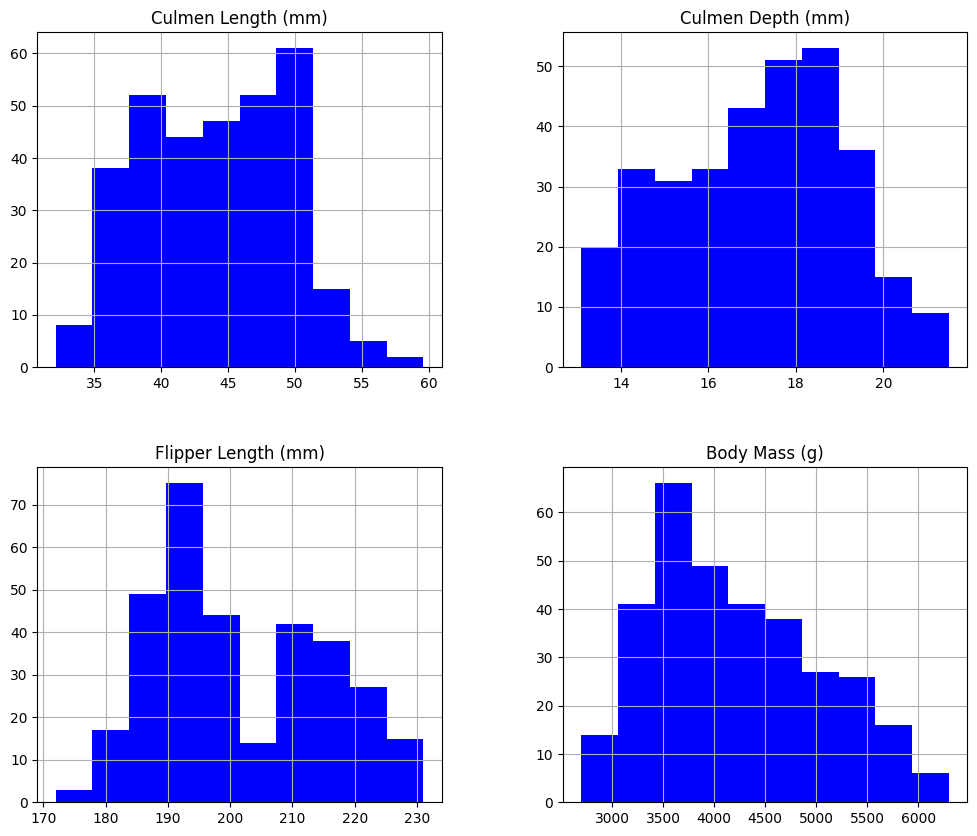

In [5]:
# Univariate Analysis
penguins_df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].hist(figsize=(12,10), bins=10, color='Blue')
plt.show()


### From the histograms above we find the following information.
- Culmen Length in most penguins is in the range from 35 to 53 mm.
- Culmen depth in most penguins is in the range from 14 to 20 mm.
- Flipper depth in most penguins is in the range from 185 to 225 mm.
- Body Mass in most penguins is in the range from 3250 to 5750 g.

## Insight Generation 💡

Based on our analysis, we generate insights into the penguin populations, focusing on habitat preferences, physical adaptations, gender dynamics, and correlations between traits.


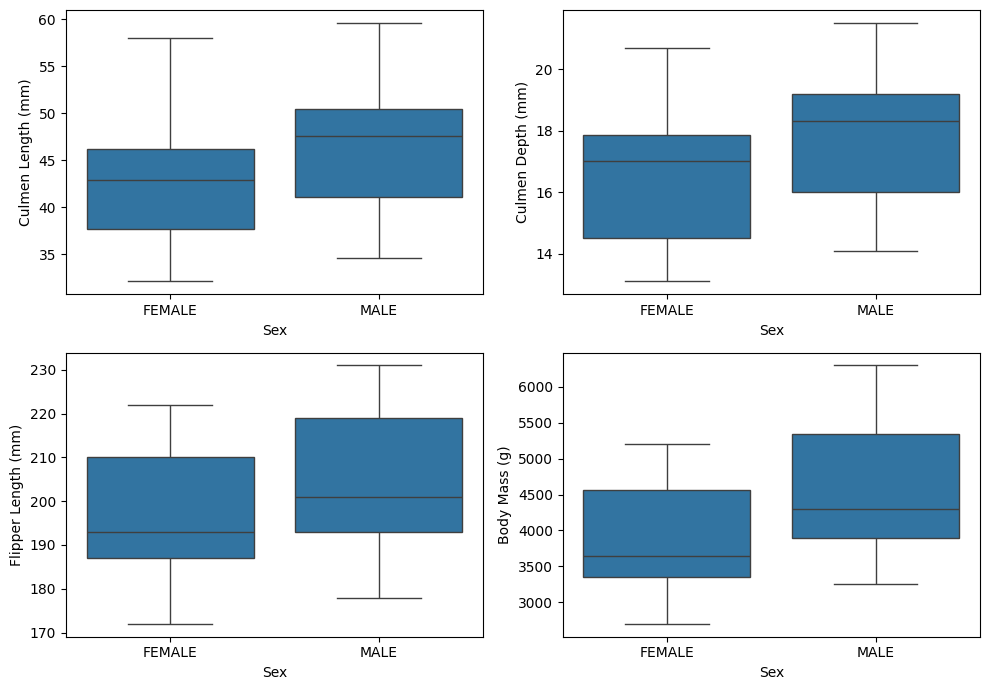

In [6]:
fig, axes = plt.subplots(2,2, figsize=(10, 7))
# boxplot to show relationship between 'Sex' and 'Culmen Length'
sns.boxplot(data=penguins_df, x='Sex', y='Culmen Length (mm)', ax=axes[0,0])
# boxplot to show relationship between 'Sex' and 'price'
sns.boxplot(data=penguins_df, x='Sex', y='Culmen Depth (mm)', ax=axes[0,1])
# boxplot to show relationship between 'Sex' and 'Culmen Depth'
sns.boxplot(data=penguins_df, x='Sex', y='Flipper Length (mm)', ax=axes[1,0])
# boxplot to show relationship between 'Sex' and 'Body Mass'
sns.boxplot(data=penguins_df, x='Sex', y='Body Mass (g)', ax=axes[1,1])
plt.tight_layout()

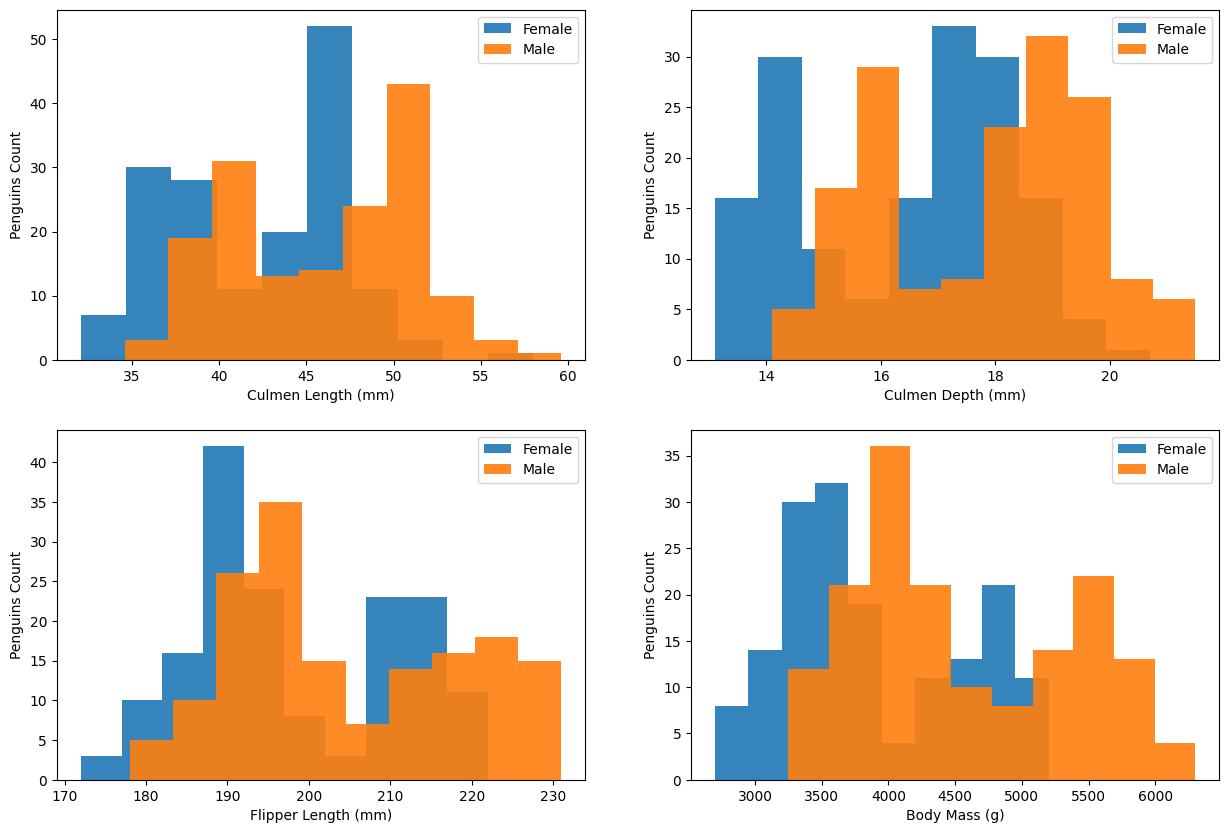

In [7]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

gender = penguins_df.groupby(by='Sex', axis=0)
female = gender.get_group('FEMALE')
male = gender.get_group('MALE')

aa = female['Culmen Length (mm)'].hist(ax=axes[0,0], alpha=0.9, bins=10)
male['Culmen Length (mm)'].hist(ax=axes[0,0], alpha=0.9, bins=10)
aa.grid(False)
aa.set_xlabel('Culmen Length (mm)')
aa.set_ylabel('Penguins Count')
aa.legend(['Female','Male'])

ab = female['Culmen Depth (mm)'].hist(ax=axes[0,1], alpha=0.9, bins=10)
male['Culmen Depth (mm)'].hist(ax=axes[0,1], alpha=0.9, bins=10)
ab.grid(False)
ab.set_xlabel('Culmen Depth (mm)')
ab.set_ylabel('Penguins Count')
ab.legend(['Female','Male'])

ac = female['Flipper Length (mm)'].hist(ax=axes[1,0], alpha=0.9, bins=10)
male['Flipper Length (mm)'].hist(ax=axes[1,0], alpha=0.9, bins=10)
ac.grid(False)
ac.set_xlabel('Flipper Length (mm)')
ac.set_ylabel('Penguins Count')
ac.legend(['Female','Male'])

ad = female['Body Mass (g)'].hist(ax=axes[1,1], alpha=0.9, bins=10)
male['Body Mass (g)'].hist(ax=axes[1,1], alpha=0.9, bins=10)
ad.grid(False)
ad.set_xlabel('Body Mass (g)')
ad.set_ylabel('Penguins Count')
ad.legend(['Female','Male'])

In [8]:
species = penguins_df.groupby(by=['Species', 'Island']).count().iloc[:,0:1]
species.rename(columns={'studyName':'Number of Penguins'}, inplace=True)
species

Number of Penguins
Species                                   Island                       
Adelie Penguin (Pygoscelis adeliae)       Biscoe                     44
                                          Dream                      52
                                          Torgersen                  43
Chinstrap penguin (Pygoscelis antarctica) Dream                      67
Gentoo penguin (Pygoscelis papua)         Biscoe                    118

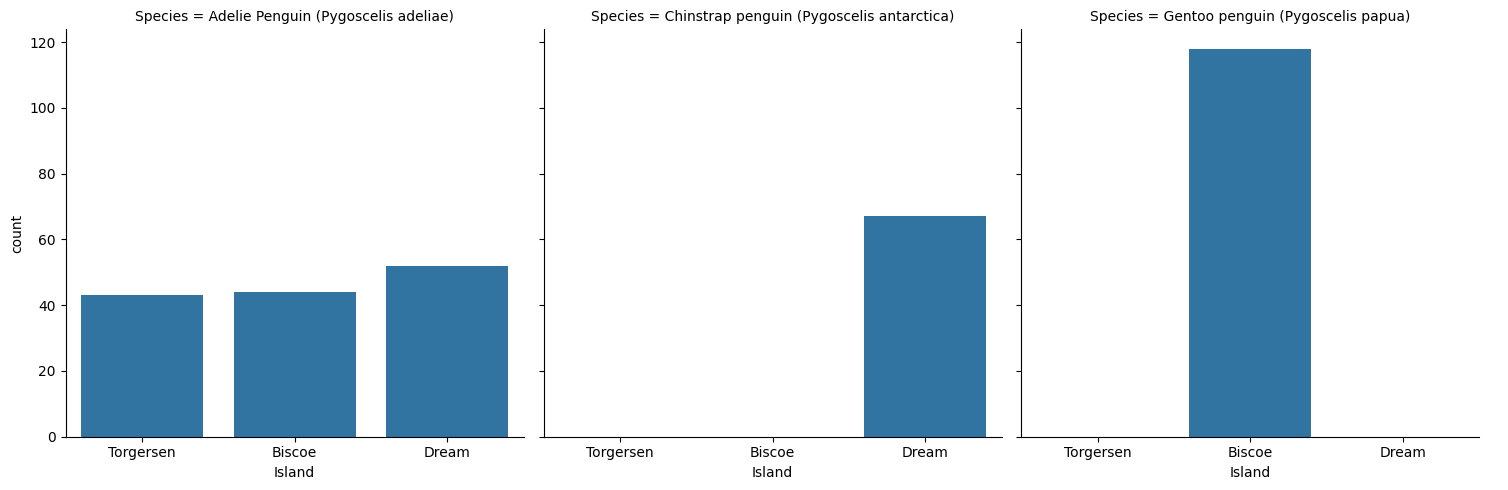

In [9]:
sns.catplot(data=penguins_df, x='Island', col='Species', kind='count')

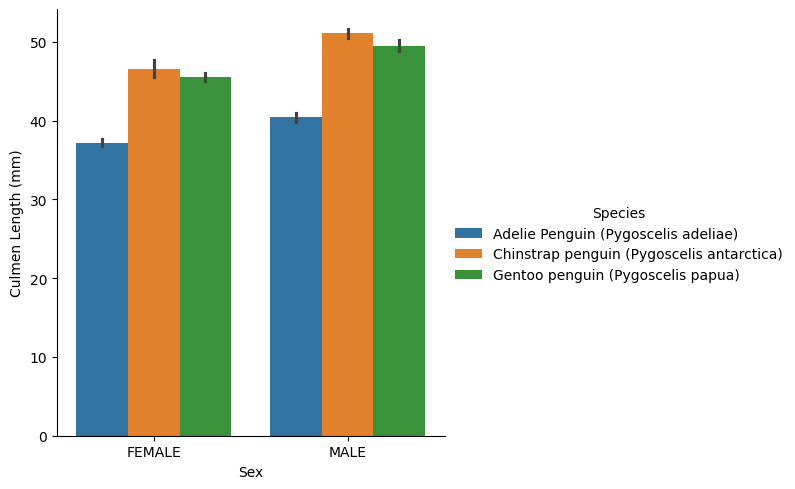

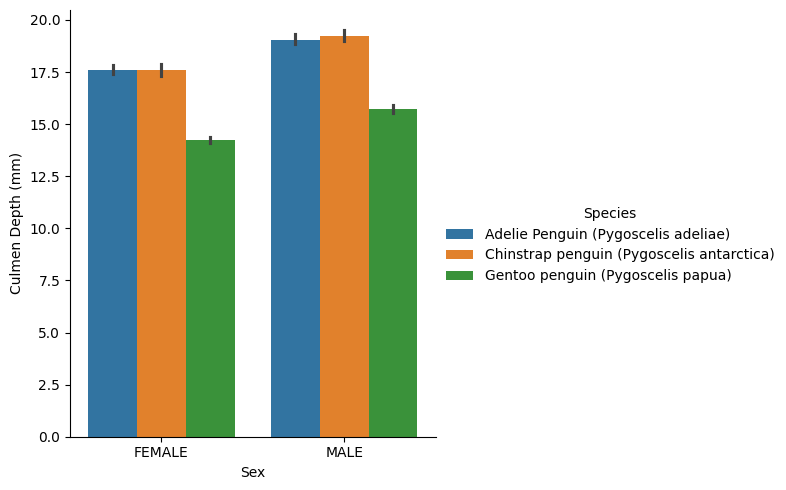

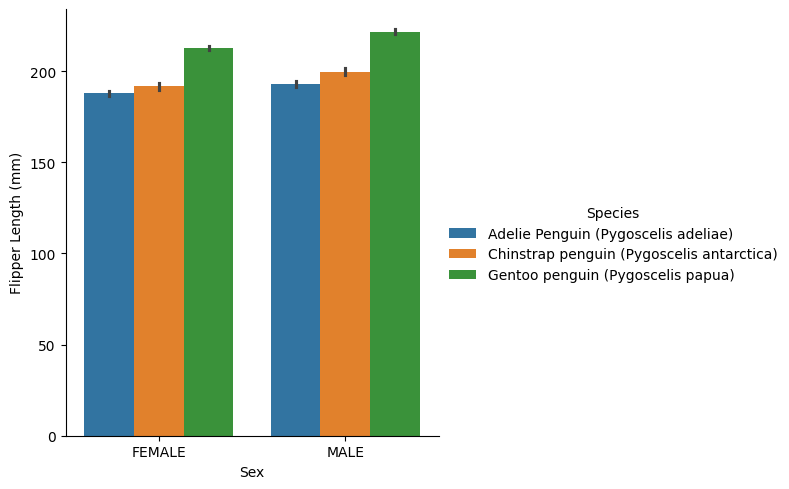

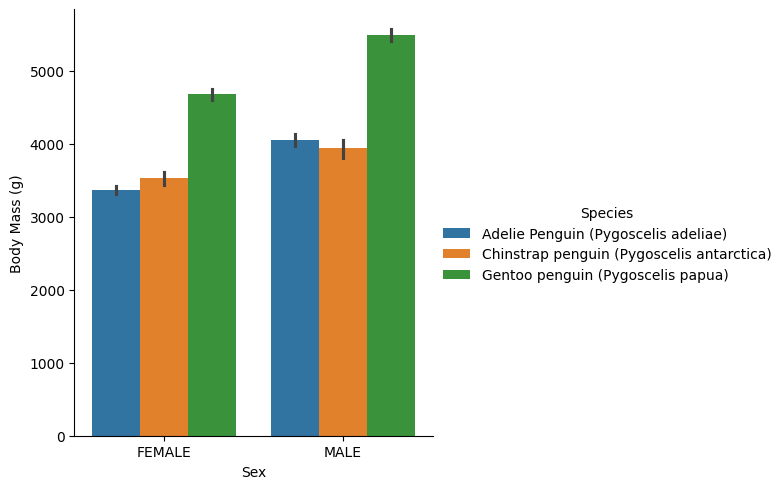

In [10]:
#catplot to show relationship between 'Sex' and 'Culmen Length' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Culmen Length (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Culmen Depth' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Culmen Depth (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Flipper Length' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Flipper Length (mm)', hue='Species', kind='bar')
#catplot to show relationship between 'Sex' and 'Body Mass' in all thre species
sns.catplot(data=penguins_df, x='Sex', y='Body Mass (g)', hue='Species', kind='bar')

### From the bar charts above we find the following information.
- Culmen length and depth, flipper length and body masses are generally greater in male penguins compared to female penguins.
- In Adeline, Chinstrap and Gentoo penguin species, generally Chinstrap penguins have longest culmen length and Adelie penguins have shortest culmen length.
- Generally, Gentoo penguins have longer flipper compared to Adeline and Chinstrap penguins which have almost similar flipper lengths.
- Generally, Gentoo penguins have higher body mass compared to Adeline and Chinstrap penguins which have almost similar body mass.


<ipython-input-11-6324f57f4954>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins_df.corr(), annot=True, fmt='.2f')


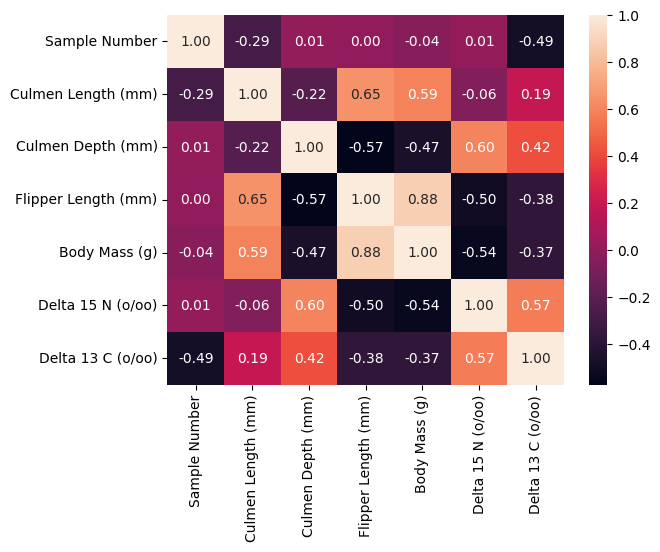

In [11]:
# Correlation Analysis
sns.heatmap(penguins_df.corr(), annot=True, fmt='.2f')
plt.show()


### From the heatmap above we find the following information.
- There is a negative corelation between penguin Body Mass and Culmen depth.
- There is a strong positive corelation between penguin Body Mass and Flipper length.
- There is a moderate positive corelation between penguin Body Mass and Culmen length.
- There is a moderate positive corelation between Flipper length and Culmen length.
- There is a moderate negative corelation between Flipper length and Culmen depth.
- There is a weak negative corelation between Culmen length and Culmen depth.


## Conclusion and Recommendations 📝

In conclusion, our EDA reveals significant insights about the penguin populations in Antarctica, which can inform conservation strategies. We discuss the implications of our findings and suggest directions for future research.

Thank you for exploring the Penguin dataset with us. We encourage you to dive deeper into the data and discover your own insights.
